In [4]:
%matplotlib inline

In [2]:
from astropy.table import Table, vstack, Column
import matplotlib.pyplot as plt
import numpy as np

In [3]:
plotpar = {'axes.labelsize': 17,
           'font.size': 10,
           'legend.fontsize': 17,
           'xtick.labelsize': 17,
           'ytick.labelsize': 17,
           'text.usetex': False}
plt.rcParams.update(plotpar)

In [6]:
def calculate_absMag(gaia_mag, parallax):
    abs_mag = gaia_mag - 5 * (np.log10(1000/parallax) - 1)  
    return abs_mag

In [78]:
df = Table.read('../catalogs/Combined/main_non_rep_garchive_after_rv_removed.vot')
df

main_non_rep_oid,source_id,Mass,Per,Rad,ra,dec,ruwe,reference,logAge,SpType,Lstar,rv_amplitude_robust,ipd_frac_multi_peak,parallax,pm,pmra,pmdec,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,ruwe_2,ruwe_f,ipd_f,rv_robust_old_bin,rv_amp_f,abs_Mag,reMass
,,solMass,d,solRad,deg,deg,,,[yr],,0.01 solLum,km / s,,mas,mas / yr,mas / yr,mas / yr,mag,mag,km / s,km / s,,,,,,,
int32,int64,float32,float64,float32,float64,float64,float64,object,float32,str6,float32,float32,int16,float64,float32,float64,float64,float32,float32,float32,float32,float32,int64,int64,int64,int64,float64,float64
1,2859027409595355776,0.26,1.08,0.27,6.14834,30.04158,1.298,Newton17,--,,--,22.453743,0,51.316075949778615,585.9754,585.8907544586369,9.959853297532621,12.960726,3.1202898,10.285248,1.3245473,1.2977159,0,0,1,0,11.511992980482372,0.21
2,416158489625704320,0.42,52.82,0.43,8.97791,52.68592,1.382,Newton17,--,,--,3.9425075,2,41.170241007502874,798.139,777.168600019981,-181.75470165920962,11.530065,2.390316,-0.6372399,0.21027899,1.3819181,0,1,1,0,9.602981629485956,0.41
3,2779735823615714176,0.3,34.01,0.32,9.89131,14.90545,1.462,Newton17,--,,--,14.191612,0,34.81687111605054,333.7426,331.9076871660051,34.94894273834515,12.900315,2.784772,3.5010433,0.75865865,1.4623499,1,0,1,0,10.609263983929928,0.3
4,2779735819320035840,0.33,1.59,0.34,9.89231,14.90984,9.76,Newton17,--,,--,37.42855,0,34.257941698203155,328.88693,327.53892627570303,29.746753158291376,12.961825,3.0671816,4.04884,1.9026254,9.759859,1,0,1,0,10.635631700426684,0.3
9,218366758786141440,0.64,13.56,0.64,56.13003,34.97243,1.149,Newton17,--,,--,1.6434832,0,38.91906820720074,254.26979,199.2893730472693,-157.91413154558745,9.984372,1.8008165,4.228812,0.16059309,1.1490544,0,0,1,0,7.93518430860877,0.6
10,476809509515283712,0.18,1.59,0.2,63.07603,64.73018,1.105,Newton17,--,,--,6.8997974,1,82.90278034597667,657.84863,492.7870898317532,-435.8046816667496,12.211264,3.003995,20.027607,0.3189078,1.1049324,0,0,1,0,11.804109136187071,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,1022456104850892928,0.58,16.88,0.58,138.60285,52.68636,1.118,Shan,--,M0.0 V,7.55,0.8336086,0,157.8824911260602,1705.8522,-1573.0402244550992,-659.9060008123529,7.054455,1.8464499,11.969568,0.122066654,1.118406,0,0,1,0,8.04612465461796,0.59


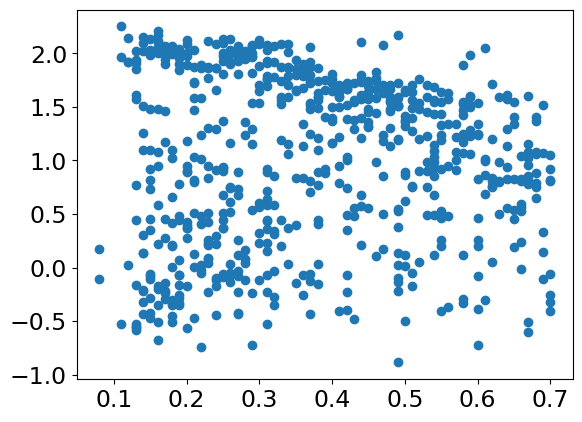

In [80]:
plt.scatter(df['Mass'], np.log10(df['Per']))
plt.show()

In [82]:
df['Mass'].info()

name = Mass
dtype = float32
unit = solMass
description = Mass of the star (4)
class = MaskedColumn
n_bad = 52
length = 701


In [84]:
df['ruwe'].info()

name = ruwe
dtype = float64
class = MaskedColumn
n_bad = 2
length = 701


In [86]:
df['phot_g_mean_mag'].info(), df['parallax'].info()

name = phot_g_mean_mag
dtype = float32
unit = mag
description = G-band mean magnitude
class = MaskedColumn
n_bad = 0
length = 701
name = parallax
dtype = float64
unit = mas
description = Parallax
class = MaskedColumn
n_bad = 2
length = 701


(None, None)

In [88]:
g_mag_array = np.array(df['phot_g_mean_mag'])
parallax_array = np.array(df['parallax'])

In [40]:
col = calculate_absMag(g_mag_array, parallax_array)
col

array([11.51199298,  9.60298163, 10.60926398, 10.6356317 ,  7.93518431,
       11.80410914,  8.77959522, 12.12188202, 11.391731  ,  8.54357536,
               nan,  9.23540199,  9.91697185,  8.31356009, 10.08470581,
        8.78432489,  8.62673455, 11.44051346, 10.87240082,  8.78314786,
        8.73913755,  8.94120147, 12.03357233,  8.58129429, 10.88459427,
        9.94547612, 11.48838361, 11.91897707, 12.77159095,  8.90644012,
       11.30012686, 12.10600672,  9.35116431,  9.36630488,  8.34206016,
        8.88124437,  8.30867201, 10.22631648, 11.20688986,  7.66275216,
       12.3541192 ,  8.23994566,  8.24677662,  9.53007508, 11.03235091,
       10.06002452,  8.54400383, 10.58345018, 11.12483727,  8.13646853,
       11.25946583, 10.59127522,  9.85841443, 11.48830228, 11.177082  ,
       11.83702085, 11.7525167 , 12.61840093,  9.28728237, 12.02027025,
       11.20670066, 10.256203  , 10.0128048 , 11.22597938, 12.22275833,
       12.18113648, 11.05826312, 10.57505627, 11.43823019, 11.63

In [48]:
# add_this_col = Column(data = col, name = 'abs_Mag')
# df.add_column('abs_Mag', add_this_col)
df['abs_Mag'] = col
df

main_non_rep_oid,source_id,Mass,Per,Rad,ra,dec,ruwe,reference,logAge,SpType,Lstar,rv_amplitude_robust,ipd_frac_multi_peak,parallax,pm,pmra,pmdec,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,ruwe_2,ruwe_f,ipd_f,rv_robust_old_bin,rv_amp_f,col27,col28,col29,col30,col31,abs_Mag
,,solMass,d,solRad,deg,deg,,,[yr],,0.01 solLum,km / s,,mas,mas / yr,mas / yr,mas / yr,mag,mag,km / s,km / s,,,,,,,,,,,
int32,int64,float32,float64,float32,float64,float64,float64,object,float32,str6,float32,float32,int16,float64,float32,float64,float64,float32,float32,float32,float32,float32,int64,int64,int64,int64,str7,str7,str7,str7,str7,float64
1,2859027409595355776,0.26,1.08,0.27,6.14834,30.04158,1.298,Newton17,--,,--,22.453743,0,51.316075949778615,585.9754,585.8907544586369,9.959853297532621,12.960726,3.1202898,10.285248,1.3245473,1.2977159,0,0,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,11.511992980482372
2,416158489625704320,0.42,52.82,0.43,8.97791,52.68592,1.382,Newton17,--,,--,3.9425075,2,41.170241007502874,798.139,777.168600019981,-181.75470165920962,11.530065,2.390316,-0.6372399,0.21027899,1.3819181,0,1,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,9.602981629485956
3,2779735823615714176,0.3,34.01,0.32,9.89131,14.90545,1.462,Newton17,--,,--,14.191612,0,34.81687111605054,333.7426,331.9076871660051,34.94894273834515,12.900315,2.784772,3.5010433,0.75865865,1.4623499,1,0,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,10.609263983929928
4,2779735819320035840,0.33,1.59,0.34,9.89231,14.90984,9.76,Newton17,--,,--,37.42855,0,34.257941698203155,328.88693,327.53892627570303,29.746753158291376,12.961825,3.0671816,4.04884,1.9026254,9.759859,1,0,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,10.635631700426684
9,218366758786141440,0.64,13.56,0.64,56.13003,34.97243,1.149,Newton17,--,,--,1.6434832,0,38.91906820720074,254.26979,199.2893730472693,-157.91413154558745,9.984372,1.8008165,4.228812,0.16059309,1.1490544,0,0,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,7.93518430860877
10,476809509515283712,0.18,1.59,0.2,63.07603,64.73018,1.105,Newton17,--,,--,6.8997974,1,82.90278034597667,657.84863,492.7870898317532,-435.8046816667496,12.211264,3.003995,20.027607,0.3189078,1.1049324,0,0,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,11.804109136187071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,1022456104850892928,0.58,16.88,0.58,138.60285,52.68636,1.118,Shan,--,M0.0 V,7.55,0.8336086,0,157.8824911260602,1705.8522,-1573.0402244550992,-659.9060008123529,7.054455,1.8464499,11.969568,0.122066654,1.118406,0,0,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,8.04612465461796


In [70]:
# df.write('../catalogs/Combined/main_non_rep_garchive_after_rv_removed.vot', format= 'votable', overwrite = True)

In [52]:
df['abs_Mag'].info()

name = abs_Mag
dtype = float64
class = Column
n_bad = 2
length = 701


In [54]:
df

main_non_rep_oid,source_id,Mass,Per,Rad,ra,dec,ruwe,reference,logAge,SpType,Lstar,rv_amplitude_robust,ipd_frac_multi_peak,parallax,pm,pmra,pmdec,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,ruwe_2,ruwe_f,ipd_f,rv_robust_old_bin,rv_amp_f,col27,col28,col29,col30,col31,abs_Mag
,,solMass,d,solRad,deg,deg,,,[yr],,0.01 solLum,km / s,,mas,mas / yr,mas / yr,mas / yr,mag,mag,km / s,km / s,,,,,,,,,,,
int32,int64,float32,float64,float32,float64,float64,float64,object,float32,str6,float32,float32,int16,float64,float32,float64,float64,float32,float32,float32,float32,float32,int64,int64,int64,int64,str7,str7,str7,str7,str7,float64
1,2859027409595355776,0.26,1.08,0.27,6.14834,30.04158,1.298,Newton17,--,,--,22.453743,0,51.316075949778615,585.9754,585.8907544586369,9.959853297532621,12.960726,3.1202898,10.285248,1.3245473,1.2977159,0,0,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,11.511992980482372
2,416158489625704320,0.42,52.82,0.43,8.97791,52.68592,1.382,Newton17,--,,--,3.9425075,2,41.170241007502874,798.139,777.168600019981,-181.75470165920962,11.530065,2.390316,-0.6372399,0.21027899,1.3819181,0,1,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,9.602981629485956
3,2779735823615714176,0.3,34.01,0.32,9.89131,14.90545,1.462,Newton17,--,,--,14.191612,0,34.81687111605054,333.7426,331.9076871660051,34.94894273834515,12.900315,2.784772,3.5010433,0.75865865,1.4623499,1,0,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,10.609263983929928
4,2779735819320035840,0.33,1.59,0.34,9.89231,14.90984,9.76,Newton17,--,,--,37.42855,0,34.257941698203155,328.88693,327.53892627570303,29.746753158291376,12.961825,3.0671816,4.04884,1.9026254,9.759859,1,0,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,10.635631700426684
9,218366758786141440,0.64,13.56,0.64,56.13003,34.97243,1.149,Newton17,--,,--,1.6434832,0,38.91906820720074,254.26979,199.2893730472693,-157.91413154558745,9.984372,1.8008165,4.228812,0.16059309,1.1490544,0,0,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,7.93518430860877
10,476809509515283712,0.18,1.59,0.2,63.07603,64.73018,1.105,Newton17,--,,--,6.8997974,1,82.90278034597667,657.84863,492.7870898317532,-435.8046816667496,12.211264,3.003995,20.027607,0.3189078,1.1049324,0,0,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,11.804109136187071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802,1022456104850892928,0.58,16.88,0.58,138.60285,52.68636,1.118,Shan,--,M0.0 V,7.55,0.8336086,0,157.8824911260602,1705.8522,-1573.0402244550992,-659.9060008123529,7.054455,1.8464499,11.969568,0.122066654,1.118406,0,0,1,0,abs_Mag,abs_Mag,abs_Mag,abs_Mag,abs_Mag,8.04612465461796


In [64]:
np.min(df['Mass'])

0.08

In [62]:
np.max(df['Mass'])

0.7

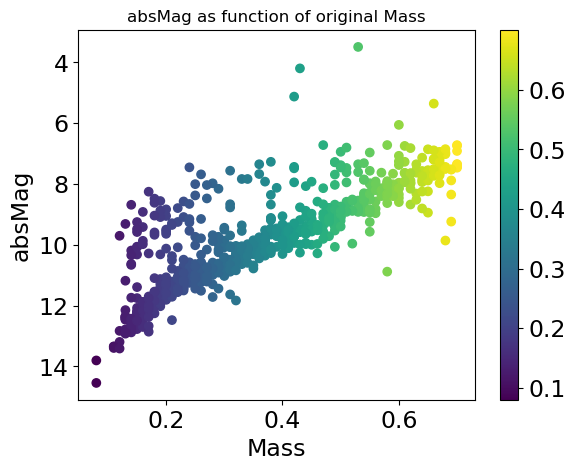

In [90]:
plt.scatter(df['Mass'], df['abs_Mag'], c = df['Mass'])
plt.gca().invert_yaxis()
plt.colorbar()
plt.xlabel('Mass')
plt.ylabel('absMag')
plt.title('absMag as function of original Mass')
plt.show()

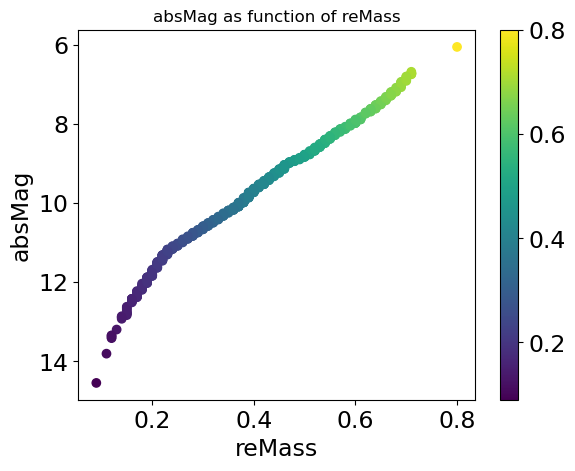

In [92]:
plt.scatter(df['reMass'], df['abs_Mag'], c = df['reMass'])
plt.gca().invert_yaxis()
plt.colorbar()
plt.xlabel('reMass')
plt.ylabel('absMag')
plt.title('absMag as function of reMass')
plt.show()

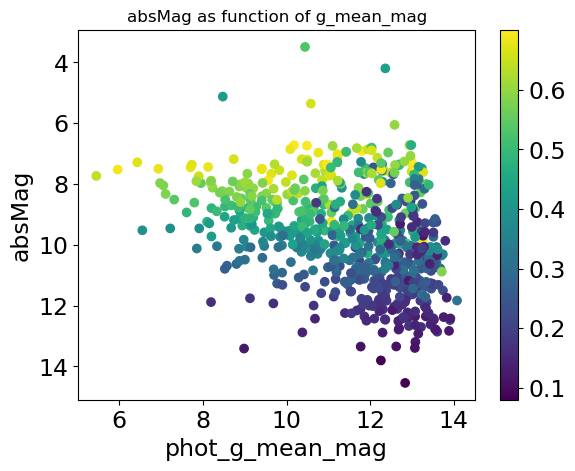

In [96]:
plt.scatter(df['phot_g_mean_mag'], df['abs_Mag'], c = df['Mass'])
plt.gca().invert_yaxis()
plt.colorbar()
plt.xlabel('phot_g_mean_mag')
plt.ylabel('absMag')
plt.title('absMag as function of g_mean_mag')
plt.show()

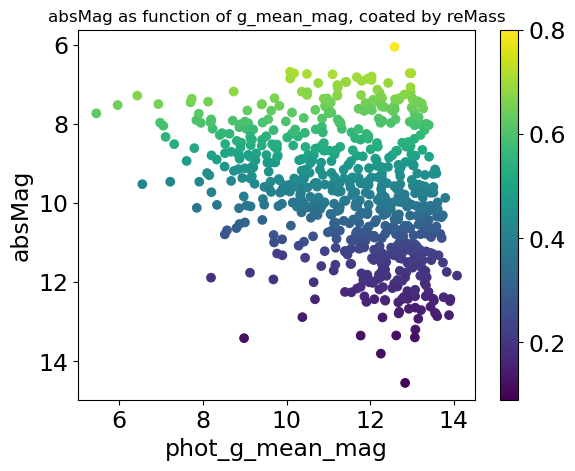

In [98]:
plt.scatter(df['phot_g_mean_mag'], df['abs_Mag'], c = df['reMass'])
plt.gca().invert_yaxis()
plt.colorbar()
plt.xlabel('phot_g_mean_mag')
plt.ylabel('absMag')
plt.title('absMag as function of g_mean_mag, coated by reMass')
plt.show()

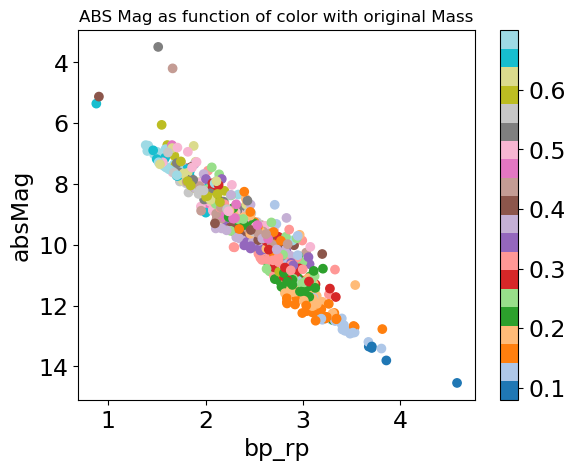

In [100]:
plt.scatter(df['bp_rp'], df['abs_Mag'], cmap = 'tab20',  c = df['Mass'])
plt.gca().invert_yaxis()
plt.colorbar()
plt.xlabel('bp_rp')
plt.ylabel('absMag')
plt.title('ABS Mag as function of color with original Mass')
plt.show()

In [102]:
df['Mass'].info()

name = Mass
dtype = float32
unit = solMass
description = Mass of the star (4)
class = MaskedColumn
n_bad = 52
length = 701


In [104]:
# df.write('../catalogs/Combined/main.vot', format ='votable', overwrite = True)

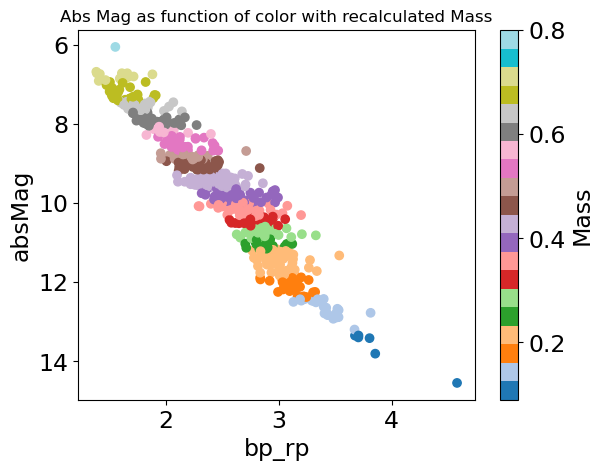

In [106]:
plt.scatter(df['bp_rp'], df['abs_Mag'], cmap = 'tab20', c = df['reMass'])
plt.gca().invert_yaxis()
plt.colorbar(label = 'Mass')

plt.xlabel('bp_rp')
plt.ylabel('absMag')
plt.title('Abs Mag as function of color with recalculated Mass')
plt.show()

In [108]:
df['rv_amplitude_robust'].info()

name = rv_amplitude_robust
dtype = float32
unit = km / s
description = Total amplitude in the radial velocity time series after outlier
     removal
class = MaskedColumn
n_bad = 0
length = 701


In [85]:
df_check = Table.read('../catalogs/Combined/main_after_remov_errors.vot')
df_check

main_after_removed_oid,main_oid,source_id,Mass,Per,Rad,ra,dec,ruwe,reference,logAge,SpType,Lstar,ruwe_2,rv_amplitude_robust,ipd_frac_multi_peak,parallax,pm,pmra,pmdec,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,ruwe_f,ipd_f,rv_robust_f,v_z,rv_amp_bin,abs_Mag,reMass,parallax_error,parallax_over_error,phot_g_mean_flux,phot_g_mean_flux_error
,,,solMass,d,solRad,deg,deg,,,[yr],,0.01 solLum,,km / s,,mas,mas / yr,mas / yr,mas / yr,mag,mag,km / s,km / s,,,,,,,,mas,,electron / s,electron / s
int32,int32,int64,float32,float64,float32,float64,float64,float64,object,float32,str6,float32,float32,float32,int16,float64,float32,float64,float64,float32,float32,float32,float32,int64,int64,int64,float64,int64,float64,float64,float32,float32,float64,float32
1,1,2797745549200763520,0.44,4.79,0.45,4.06432,19.85704,1.554,Newton17,--,,--,1.5539801,55.223293,6,65.10811689055409,1044.6532,714.6345511276562,-761.9696674473287,10.908869,2.841834,6.9795403,3.902364,1,1,1,-49.80906158947147,1,9.97704446223993,0.12,0.041267276,1577.7178,815453.7335608437,515.7094
2,2,2859027409595355776,0.26,1.08,0.27,6.14834,30.04158,1.298,Newton17,--,,--,1.2977159,22.453743,0,51.316075949778615,585.9754,585.8907544586369,9.959853297532621,12.960726,3.1202898,10.285248,1.3245473,0,0,1,5.945556708153161,0,11.511992980482372,0.09,0.042310424,1212.847,123212.95895604898,96.01673
3,3,416158489625704320,0.42,52.82,0.43,8.97791,52.68592,1.382,Newton17,--,,--,1.3819181,3.9425075,2,41.170241007502874,798.139,777.168600019981,-181.75470165920962,11.530065,2.390316,-0.6372399,0.21027899,0,1,1,-13.192910481385432,0,9.602981629485956,0.14,0.03242564,1269.6816,460172.8169031302,252.12415
4,4,2779735823615714176,0.3,34.01,0.32,9.89131,14.90545,1.462,Newton17,--,,--,1.4623499,14.191612,0,34.81687111605054,333.7426,331.9076871660051,34.94894273834515,12.900315,2.784772,3.5010433,0.75865865,1,0,1,5.498893225545977,0,10.609263983929928,0.1,0.031152343,1117.6324,130262.9094045977,103.26037
5,5,2779735819320035840,0.33,1.59,0.34,9.89231,14.90984,9.76,Newton17,--,,--,9.759859,37.42855,0,34.257941698203155,328.88693,327.53892627570303,29.746753158291376,12.961825,3.0671816,4.04884,1.9026254,1,0,1,5.019406935260629,0,10.635631700426684,0.1,0.21735539,157.61256,123088.28272834107,84.48141
6,8,374400957846408192,0.67,0.25,0.67,15.91794,40.85738,9.285,Newton17,--,,--,9.28536,18.88665,1,32.81128216805046,195.86702,115.99952125547368,-157.82267852136772,10.131072,1.7057018,-16.219627,1.7936746,1,0,1,-27.856391040024707,1,7.711188052692503,0.26,0.19001044,172.68146,1669237.3222119298,1377.9982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,2194,2611163717366876544,0.55,1.6,0.47,342.58046,-7.08964,1.085,Wright,--,,--,1.0850837,0.68982315,0,68.93028118372844,148.73949,-106.57232266763265,103.75824912054978,9.132903,1.9275532,-5.9487762,0.15217462,0,0,1,7.815310863636578,0,8.324953349524073,0.21,0.019456035,3542.8743,4185867.9672035477,1468.5061


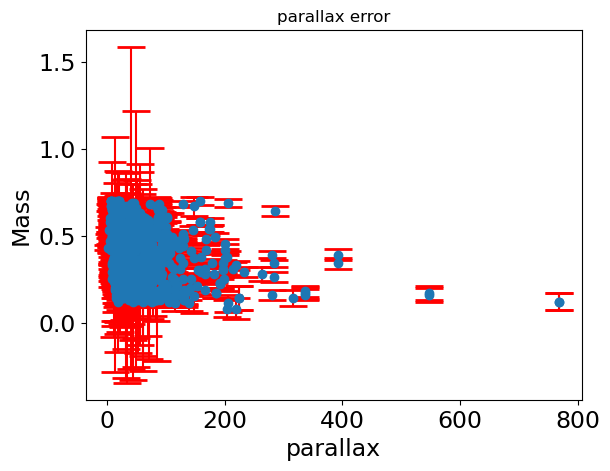

In [87]:
plt.xlabel('parallax')
plt.ylabel('Mass')
plt.title('')
plt.errorbar(df_check['parallax'], df_check['Mass'], yerr= df_check['parallax_error'], fmt='o', capsize=10, capthick=2, ecolor='red')
plt.title('parallax error')

plt.show()

In [13]:
df['Mass'].info()

name = Mass
dtype = float32
unit = solMass
description = Mass of the star (4)
class = MaskedColumn
n_bad = 62
length = 820
